In [5]:
from PIL import Image
import torch
from torch.autograd import Variable
from torch.optim import RMSprop
from torchvision import transforms
from torch.backends import cudnn

from models import HourGlass
from datasets import DIW
from criterion import RelativeDepthLoss
from train_utils import fit, prep_img, save_models
import pandas as pd
import os
import numpy as np
from albumentations.pytorch import ToTensorV2
import albumentations as A

In [6]:
class CFG:
    path = '/tmp/working/workspace/Depth_perception_in_the_wild/data/DIW_Annotations/'
    data_path = '/tmp/working/workspace/Depth_perception_in_the_wild/data/'
    test_index=2
    lr=1e-3
    batch_size=24
    epoch=10
    exp_name="ex1"
    output_dir = f'./output/{exp_name}/'
    savemodel=f'./output/{exp_name}/model_{exp_name}.pth'
    im_sizew=496
    im_sizeh=496
    seed = 42

In [7]:
def prep_img(img):
    return Variable(img.unsqueeze(0)).cuda()

In [8]:
to_pil = transforms.ToPILImage()

def show_img(tensor):
    img = to_pil((tensor - tensor.min()) / (tensor.max() - tensor.min()))  # min/max scaling
    return img

In [11]:
def get_train_transforms(epoch):
    return A.Compose(
        [             
            A.Resize(CFG.im_sizeh,CFG.im_sizew),
            ToTensorV2(),
        ]
  )

In [9]:
hourglass = HourGlass()
hourglass.load_state_dict(torch.load(CFG.savemodel))
hourglass.cuda();

In [13]:
train = DIW(CFG.data_path+'DIW_train_val', CFG.path+"labels_train.pkl", transforms=get_train_transforms(0))

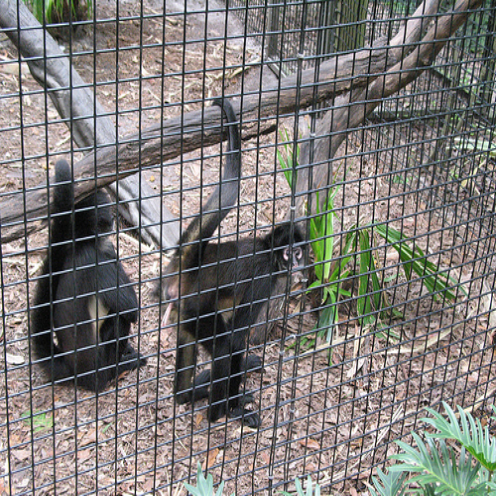

In [15]:
show_img(train[CFG.test_index][0])

In [16]:
out = hourglass(prep_img(train[2][0]))

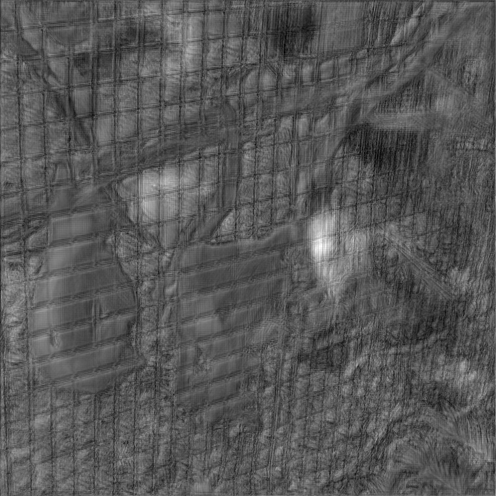

In [17]:
show_img(out.data.cpu()[0])